In [95]:
import matplotlib.pyplot as plt
import numpy as np


In [101]:
# config
field_1 = 'roc_auc'
field_2 = 'val_roc_auc'
log_path = 'info.log'

# Pre process Log file

In [102]:
def read_file():
	with open(log_path, "r") as txt_file:
		return txt_file.readlines()

logs = read_file()
logs = list(map(lambda x: x[43:], logs))
logs = [log for log in logs if not 'Saving current best' in log]
logs = np.array_split(logs, len(logs) / 6)

In [100]:
plot_map = {}
plot_map[field_1] = {}
plot_map[field_2] = {}

def find_field(field, log):
	for str in log:
		if field in str:
			return float(str[(str.index(': ') + 2):].replace('\n', ''))

def process_log_plot(field, log, fold, epoch):
	data = plot_map[field]
	if not fold in data:
		data[fold] = {
			'x': [],
			'y': []
		}

	data[fold]['x'].append(epoch)
	data[fold]['y'].append(find_field(field, log))

for log in logs:
	fold = log[5][72:].replace('.pth ...\n', '')
	epoch = find_field('epoch', log)
	process_log_plot(field_1, log, fold, epoch)
	process_log_plot(field_2, log, fold, epoch)


# Draw Plot

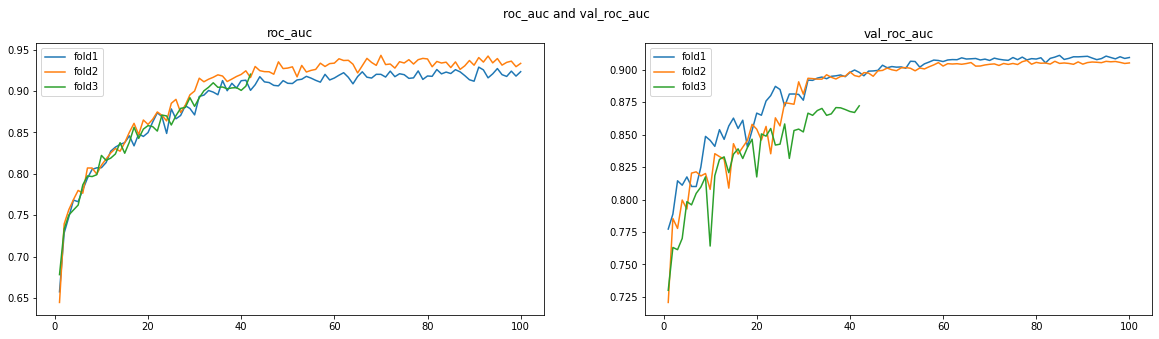

In [99]:
# Median Developer Salaries by Age
plt.rcParams["figure.figsize"] = (20,5)

fig, axs = plt.subplots(1, 2, facecolor='w')
fig.suptitle(f'{field_1} and {field_2}')

axs[0].set_title(field_1)
axs[1].set_title(field_2)


for key, value in plot_map[field_1].items():
    axs[0].plot(value['x'], value['y'], label = key)
    axs[0].legend()

for key, value in plot_map[field_2].items():
    axs[1].plot(value['x'], value['y'], label = key)
    axs[1].legend()

plt.savefig(f'{field_1} and {field_2}')
plt.show()